<a href="https://colab.research.google.com/github/Temka1358/Portfolio/blob/main/EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydantic python-dotenv Pillow easyocr jiwer deskew scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import io

import cv2
import easyocr
import numpy as np
import requests
from deskew import determine_skew
from jiwer import cer
from PIL import Image, ImageDraw, ImageFont
from skimage.transform import rotate
from functools import lru_cache


def show_image(image_array):
    """Convert OpenCV to PIL and show"""
    image_pil = Image.fromarray(cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB))
    image_pil.show()


@lru_cache(maxsize=None)
def load_font(font_size=14):
    """Download font and cache it"""
    font_url = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
    r = requests.get(font_url, allow_redirects=True)
    font = ImageFont.truetype(io.BytesIO(r.content), font_size)
    return font


def draw_on_image(image: Image, pts: list, text: str, font_size=14):
    """Draw bounding box and text on image"""
    draw = ImageDraw.Draw(image)
    pts = np.array(pts, np.int32)
    draw.polygon(pts.flatten().tolist(), outline=(0, 255, 0))
    text_point = (pts[0] + pts[3]) / 2
    draw.text(text_point, text, (0, 0, 128), load_font(font_size))
    # return image

In [ ]:
truth_list = [
    'МОНГОЛ УЛСЫН ИРГЭНИЙ ҮНЭМЛЭХ',
    'CITIZEN IDENTITY CARD OF MONGOLIA',
    'Овог Family name',
    'Цаст уулынхан',
    'Tsast uulynkhan',
    'Эцэг/эх/-ийн нэр Surname',
    'Магсар',
    'Magsar',
    'Нэр Given name',
    'ЭРДЭНЭЧИМЭГ ERDENECHIMEG',
    'Хүйс Sex',
    'Эмэгтэй /Female',
    'Төрсөн он, cap, өдөр',
    'Date of birth',
    '1973/02/14',
    'Регистрийн дүгаар Registration number',
    'ПН73021401 /PN73021401',
]

In [ ]:
# Load image
# dir_path = '/content/drive/MyDrive/Colab Notebooks/OCR/images/'
# image_path = f'{dir_path}raw02b.jpg'

image_path = '/content/drive/MyDrive/BNrCoKNCUAAQb7y.jpg'

# PIL open image as RGB
image_pil = Image.open(image_path)
# PIL to OpenCV
image = cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)
# To Grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Reducing noise
# image = cv2.medianBlur(image, 5)
# show_image(image)

reader = easyocr.Reader(['mn', 'en'], gpu=False)

In [ ]:

# Deskew image
angle = determine_skew(image)
image_rotated = (rotate(image, angle, resize=True) * 255).astype(np.uint8)
show_image(image_rotated)

In [ ]:

result = reader.readtext(image, detail=1, paragraph=False)

read_text = ' '.join([text for _, text, _ in result])
truth_text = ' '.join(truth_list)
print(f"CER: {cer(truth_text, read_text)*100:.2f}%")

for box, text, confidence in result:
    draw_on_image(image_pil, box, text, font_size=12)

image_pil

CER: 51.56%


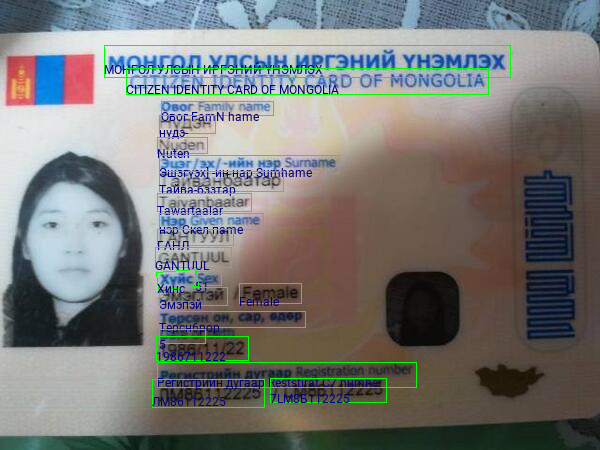

In [ ]:
image_pil

In [ ]:
result

[([[104, 45], [510, 45], [510, 77], [104, 77]],
  'МОНГОЛ УЛСЫН ИРГЭНИЙ ҮНЭМЛЭХ',
  0.9957118579133509),
 ([[126, 68], [488, 68], [488, 94], [126, 94]],
  'CITIZEN IDENTITY CARD OF MONGOLIA',
  0.989252414303539),
 ([[161, 101], [273, 101], [273, 115], [161, 115]],
  'Овог FamN hamе',
  0.8616150532820875),
 ([[159, 115], [215, 115], [215, 133], [159, 133]],
  'нүдэ-',
  0.399111862468356),
 ([[157, 137], [207, 137], [207, 153], [157, 153]],
  'Nuten',
  0.8685508693827934),
 ([[159, 155], [339, 155], [339, 173], [159, 173]],
  'Эшзгүэх] -ин нар Sumhame',
  0.31551609723050733),
 ([[159, 171], [283, 171], [283, 191], [159, 191]],
  'Тайва-бззтар',
  0.5561224007256819),
 ([[157, 193], [251, 193], [251, 211], [157, 211]],
  'Tawartaalar',
  0.595548410465672),
 ([[159, 213], [263, 213], [263, 229], [159, 229]],
  'нэр Скел паme',
  0.11857160325009788),
 ([[157, 229], [233, 229], [233, 245], [157, 245]],
  'ГАНЛ',
  0.5329106450080872),
 ([[155, 247], [231, 247], [231, 267], [155, 267]]